In [93]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [94]:
df = pd.read_csv("data6.tsv", sep='\t', header = None)
df.columns = ['x', 'y']
df.head()

,x,y
0,21.252,-555.640
1,179.842,3840.141
2,118.162,2274.989
3,114.269,1146.575
4,121.444,1840.589


In [95]:
data, data_test = train_test_split(df, test_size=0.1,random_state=13)

## Regresja wielomianowa pierwszego stopnia

In [96]:
data= data.dropna() 
X = data["x"].to_numpy().reshape(-1, 1)
y = data["y"].to_numpy().reshape(-1, 1)
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.8941787919388406

<Axes: xlabel='x', ylabel='y'>

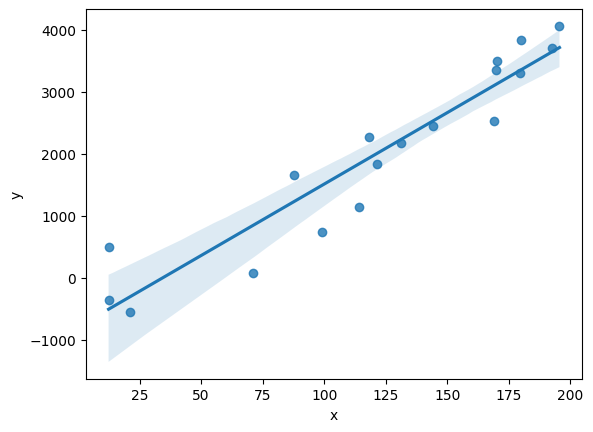

In [97]:
sns.regplot(x=data.iloc[:,0], y=data.iloc[:,1])

In [98]:
y_pred = reg.predict(X)
mean_squared_error = mean_squared_error(y, y_pred)
variance = mean_squared_error * (len(y) - 1)
print(f"Variance: {variance:.2f}")

Variance: 3747881.37


## Regresja wielomianowa drugiego stopnia

In [99]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y.ravel())
score = model.score(X_poly, y)
score

0.9185393333487841

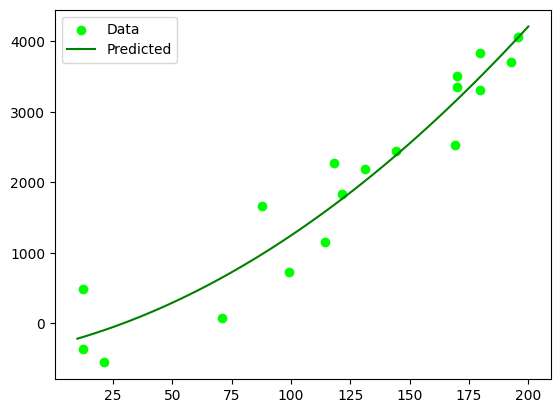

In [100]:
x_vals = np.linspace(10, 200, 50).reshape(-1, 1)
x_poly_vals = poly.transform(x_vals)
y_pred = model.predict(x_poly_vals)
plt.scatter(data.iloc[:, 0], data.iloc[:,1], color= "lime", label='Data')
plt.plot(x_vals, y_pred, color='green', label='Predicted')
plt.legend()
plt.show()

## Regresja wielomianowa piątego stopnia

In [101]:
poly = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y.ravel())
score = model.score(X_poly, y)
score

0.9325671409006681

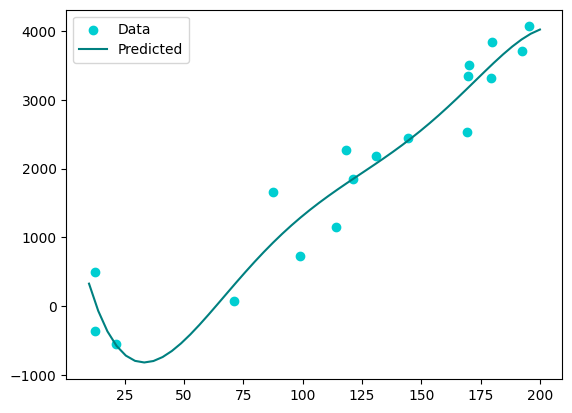

In [102]:
x_vals = np.linspace(10, 200, 50).reshape(-1, 1)
x_poly_vals = poly.transform(x_vals)
y_pred = model.predict(x_poly_vals)
plt.scatter(data.iloc[:, 0], data.iloc[:,1], color= "darkturquoise", label='Data')
plt.plot(x_vals, y_pred, color='teal', label='Predicted')
plt.legend()
plt.show()

## Regresja wielomianowa piątego stopnia, ale z regularyzacją

In [103]:
ridge = Ridge(alpha = 1000)
ridge.fit(X_poly, y)
print(ridge.score(X_poly,y))

0.9242039640874888


C:\Users\marty\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.19185e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


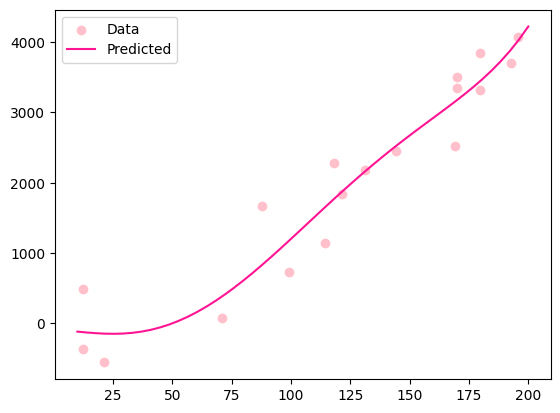

In [104]:
x_vals = np.linspace(10, 200, 50).reshape(-1, 1)
y_pred = ridge.predict(x_poly_vals)
plt.scatter(data.iloc[:, 0], data.iloc[:,1], color= "pink", label='Data')
plt.plot(x_vals, y_pred, color = "deeppink", label='Predicted')
plt.legend()
plt.show()